In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/home/afroteop/Documents/pythondsp-pandasguide-b936c3b43406/data/titles.csv')

In [12]:
df.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


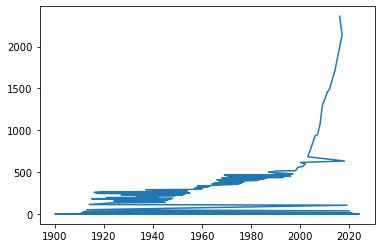

In [23]:
t = df

p = t['year'].value_counts()

p.plot()

plt.show()

It is better when we sort year by index

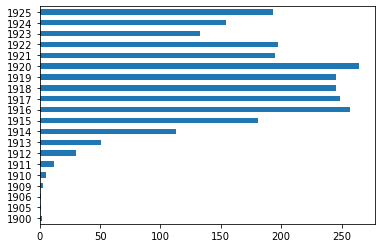

In [24]:
p = p.sort_index().head(20)

p.plot(kind='barh')

plt.show()

### Unstack

In [53]:
cast = pd.read_csv('/home/afroteop/Documents/pythondsp-pandasguide-b936c3b43406/data/cast.csv')

In [54]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [55]:
c = cast
c = c.groupby([c['year']//10*10,'type']).size().head(10)
c

year  type   
1910  actor       384
      actress     285
1920  actor       710
      actress     411
1930  actor      2628
      actress     820
1940  actor      3014
      actress     983
1950  actor      2877
      actress    1015
dtype: int64

In [56]:
c = cast
c_decade = c.groupby(['type',c['year']//10*10]).size()

c_decade

type     year
actor    1910      384
         1920      710
         1930     2628
         1940     3014
         1950     2877
         1960     2775
         1970     3044
         1980     3565
         1990     5108
         2000    10368
         2010    15523
         2020        4
actress  1910      285
         1920      411
         1930      820
         1940      983
         1950     1015
         1960      968
         1970     1299
         1980     1989
         1990     2544
         2000     5831
         2010     8853
         2020        3
dtype: int64

creation of unstack

In [57]:
c_decade.unstack()

year,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
type,,,,,,,,,,,,
actor,384,710,2628,3014,2877,2775,3044,3565,5108,10368,15523,4
actress,285,411,820,983,1015,968,1299,1989,2544,5831,8853,3


### Plotting the unstack

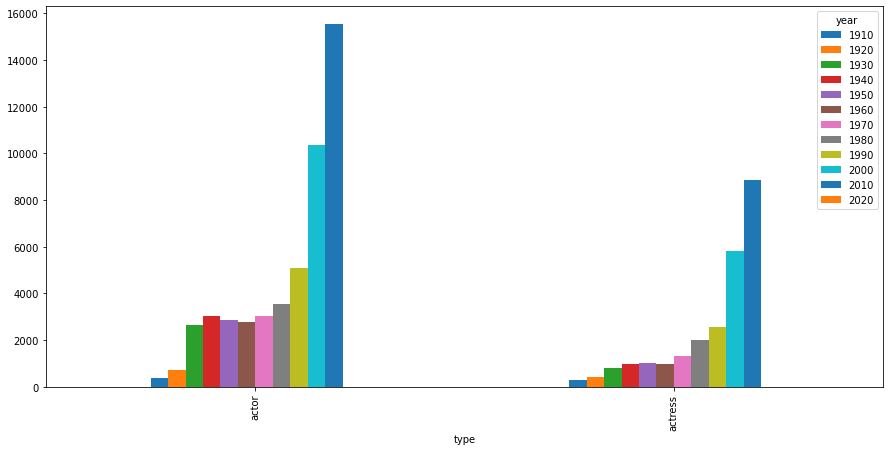

In [58]:
c_decade.unstack().plot(kind='bar',figsize=(15,7))

plt.show()

In [59]:
c_decade.unstack(0)

type,actor,actress
year,,
1910,384,285
1920,710,411
1930,2628,820
1940,3014,983
1950,2877,1015
1960,2775,968
1970,3044,1299
1980,3565,1989
1990,5108,2544


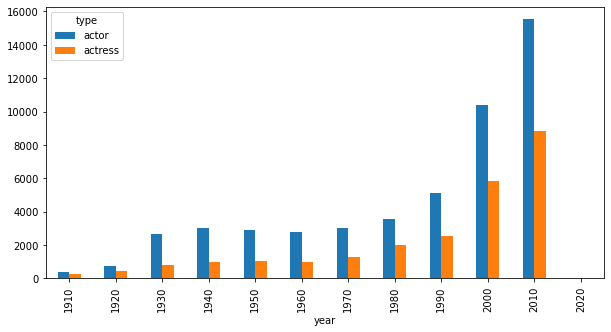

In [61]:
c_decade.unstack(0).plot(kind='bar',figsize=(10,5))

plt.show()

### Merge

In [62]:
release = pd.read_csv('/home/afroteop/Documents/pythondsp-pandasguide-b936c3b43406/data/release_dates.csv')

In [63]:
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [64]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [70]:
check1 = release[release['title'] == 'Amelia']

check2 = cast[cast['title'] == 'Amelia']

In [75]:
check2.merge(check1).head()

,title,year,name,type,character,n,country,date
0,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Canada,2009-10-23
1,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,USA,2009-10-23
2,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Australia,2009-11-12
3,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Singapore,2009-11-12
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Ireland,2009-11-13


# Numpy

Numerical Python is used to perform numerical computation in python.

creating Arrays

In [76]:
import numpy as np

In [77]:
#  1D array

d = np.array([1,2,3,4,5])

d

array([1, 2, 3, 4, 5])

In [79]:
d.shape

(5,)

In [78]:
#  multi dimensional

nd = np.array([[1,2,3],[4,5,6],[7,8,9]])

nd

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [80]:
nd.shape

(3, 3)

In [82]:
# define zero matrix

np.zeros(3)

array([0., 0., 0.])

In [83]:
np.zeros([3,2])

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [89]:
# diagonal matrix

e = np.eye(4)

e

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [90]:
# add 2 to e 

e2 = e + 2

e2

array([[3., 2., 2., 2.],
       [2., 3., 2., 2.],
       [2., 2., 3., 2.],
       [2., 2., 2., 3.]])

In [94]:
# create matrix with all entries as 1 and size as e2

o = np.ones_like(e2)

o

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [95]:
# get the first value in the matrix

o[0,0]

1.0

In [96]:
type(o)

numpy.ndarray

In [97]:
o.dtype

dtype('float64')

In [99]:
# changing the data type

oi = o.astype(np.int32)

oi

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)

In [100]:
oi.dtype

dtype('int32')

### Boolean Indexing

Boolean indexing is very important feature of numpy , which is frequently used in pandas

In [112]:
# get random data

data = np.random.randn(5,4)

data

array([[ 0.08730844, -2.76341723,  1.51115987,  0.9063969 ],
       [-0.22145706,  1.12857457,  0.84405879,  1.82362797],
       [-1.54549703, -0.23754563,  0.41266285, -1.4651018 ],
       [-0.97699734,  0.60591711, -1.752955  ,  1.3827202 ],
       [ 0.35252646,  0.36865479, -0.0535004 ,  0.37167829]])

In [103]:
name = np.array(['a','b','c','a','b'])

name=='a'

array([ True, False, False,  True, False])

In [104]:
data[name=='a']

array([[ 1.83546245, -0.51891769,  0.92262723, -0.83192549],
       [ 2.25128868, -0.10149508,  2.41505993, -0.97007373]])

In [105]:
data[name != 'a']

array([[-2.01659831, -0.41923633,  0.42088537,  2.01544162],
       [-1.88336201, -0.45038421, -0.89575602,  0.83890224],
       [ 0.29593098,  0.88622488,  2.121757  , -0.71183861]])

In [107]:
data[(name == 'b') | (name == 'c')]

array([[-2.01659831, -0.41923633,  0.42088537,  2.01544162],
       [-1.88336201, -0.45038421, -0.89575602,  0.83890224],
       [ 0.29593098,  0.88622488,  2.121757  , -0.71183861]])

In [113]:
data[(data > 1) & (data < 2)]

array([1.51115987, 1.12857457, 1.82362797, 1.3827202 ])

#### Reshaping Array

In [114]:
a = np.arange(0,20)

a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [124]:
# reshape

a54 = a.reshape(5,4)

a54

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [125]:
#  select row 2,0 and 1 and store in b

b = a54[[2,0,1]]

b

array([[ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [127]:
# transpose

c= b.T

c

array([[ 8,  0,  4],
       [ 9,  1,  5],
       [10,  2,  6],
       [11,  3,  7]])

#### concatenating data

combining data to two array

In [129]:
arr = np.arange(12).reshape(3,4)

rn = np.random.randn(3,4)

In [130]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [131]:
rn

array([[-0.33682757, -2.00273219, -0.04505643,  0.73514599],
       [ 0.87575214, -0.14194915, -0.94941537, -2.37843064],
       [ 2.6875423 , -1.34682781, -1.00156327,  1.01118616]])

In [132]:
# merge the two data

np.concatenate([arr,rn])

array([[ 0.        ,  1.        ,  2.        ,  3.        ],
       [ 4.        ,  5.        ,  6.        ,  7.        ],
       [ 8.        ,  9.        , 10.        , 11.        ],
       [-0.33682757, -2.00273219, -0.04505643,  0.73514599],
       [ 0.87575214, -0.14194915, -0.94941537, -2.37843064],
       [ 2.6875423 , -1.34682781, -1.00156327,  1.01118616]])

#### Data processing

Most of programming work in data analysis and modeling is spent on data preparation e.g. loading, cleaning and rearranging the data etc. Pandas along with python libraries gives us provide us a high performance, flexible and high level environment for processing the data.

In chapter 1, we saw basics of pandas; then various examples are shown in chapter 2 for better understanding of pandas; whereas chapter 3 presented some basics of numpy. In this chapter, we will see some more functionality of pandas to process the data effectively.

# TIME SERIES

In [3]:
import pandas as pd

import numpy as np

#### Generate series of time

A series of time can be generated using ‘date_range’ command. In below code, ‘periods’ is the total number of samples; whereas freq = ‘M’ represents that series must be generated based on ‘Month’.

By default, pandas consider ‘M’ as end of the month. Use ‘MS’ for start of the month. Similarly, other options are also available for day (‘D’), business days (‘B’) and hours (‘H’) etc.

In [8]:
rng = pd.date_range('2022-03-01 10:15', periods=10, freq='M')

In [9]:
rng

DatetimeIndex(['2022-03-31 10:15:00', '2022-04-30 10:15:00',
               '2022-05-31 10:15:00', '2022-06-30 10:15:00',
               '2022-07-31 10:15:00', '2022-08-31 10:15:00',
               '2022-09-30 10:15:00', '2022-10-31 10:15:00',
               '2022-11-30 10:15:00', '2022-12-31 10:15:00'],
              dtype='datetime64[ns]', freq='M')

In [10]:
rng2 = pd.date_range('2022 Jul 14 10:15', periods=10, freq='M')

rng2

DatetimeIndex(['2022-07-31 10:15:00', '2022-08-31 10:15:00',
               '2022-09-30 10:15:00', '2022-10-31 10:15:00',
               '2022-11-30 10:15:00', '2022-12-31 10:15:00',
               '2023-01-31 10:15:00', '2023-02-28 10:15:00',
               '2023-03-31 10:15:00', '2023-04-30 10:15:00'],
              dtype='datetime64[ns]', freq='M')

Date time index series can also be generated usin 'start' and 'end' parameters

In [18]:
rng3 = pd.date_range(start = '2022 Jul 14 10:20', end='2022 Jul 31 10:19', freq='12H')

rng3

DatetimeIndex(['2022-07-14 10:20:00', '2022-07-14 22:20:00',
               '2022-07-15 10:20:00', '2022-07-15 22:20:00',
               '2022-07-16 10:20:00', '2022-07-16 22:20:00',
               '2022-07-17 10:20:00', '2022-07-17 22:20:00',
               '2022-07-18 10:20:00', '2022-07-18 22:20:00',
               '2022-07-19 10:20:00', '2022-07-19 22:20:00',
               '2022-07-20 10:20:00', '2022-07-20 22:20:00',
               '2022-07-21 10:20:00', '2022-07-21 22:20:00',
               '2022-07-22 10:20:00', '2022-07-22 22:20:00',
               '2022-07-23 10:20:00', '2022-07-23 22:20:00',
               '2022-07-24 10:20:00', '2022-07-24 22:20:00',
               '2022-07-25 10:20:00', '2022-07-25 22:20:00',
               '2022-07-26 10:20:00', '2022-07-26 22:20:00',
               '2022-07-27 10:20:00', '2022-07-27 22:20:00',
               '2022-07-28 10:20:00', '2022-07-28 22:20:00',
               '2022-07-29 10:20:00', '2022-07-29 22:20:00',
               '2022-07-

Time zone can be specified for generating the series

In [23]:
rng4 = pd.date_range(start = '2022 Jul 14 10:20', end='2022 Jul 31 10:19', freq='12H', tz='Africa/Nairobi')

In [24]:
rng4

DatetimeIndex(['2022-07-14 10:20:00+03:00', '2022-07-14 22:20:00+03:00',
               '2022-07-15 10:20:00+03:00', '2022-07-15 22:20:00+03:00',
               '2022-07-16 10:20:00+03:00', '2022-07-16 22:20:00+03:00',
               '2022-07-17 10:20:00+03:00', '2022-07-17 22:20:00+03:00',
               '2022-07-18 10:20:00+03:00', '2022-07-18 22:20:00+03:00',
               '2022-07-19 10:20:00+03:00', '2022-07-19 22:20:00+03:00',
               '2022-07-20 10:20:00+03:00', '2022-07-20 22:20:00+03:00',
               '2022-07-21 10:20:00+03:00', '2022-07-21 22:20:00+03:00',
               '2022-07-22 10:20:00+03:00', '2022-07-22 22:20:00+03:00',
               '2022-07-23 10:20:00+03:00', '2022-07-23 22:20:00+03:00',
               '2022-07-24 10:20:00+03:00', '2022-07-24 22:20:00+03:00',
               '2022-07-25 10:20:00+03:00', '2022-07-25 22:20:00+03:00',
               '2022-07-26 10:20:00+03:00', '2022-07-26 22:20:00+03:00',
               '2022-07-27 10:20:00+03:00', '2022-0

All the dates use Time stamp type

In [27]:
type(rng4[0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
#  the data structure produces are list

type([rng4])

list

In [29]:
# the type is DatetimeIndex

type(rng4)

pandas.core.indexes.datetimes.DatetimeIndex

### Converting string to dates

Dates in string format can be converted into time stamp using 'to_datetime'

In [33]:
dd = ['07/07/2022','08/07/2022', '09/07/2022']

type(dd[0])

str

In [35]:
# convert to Africa Nairobi

list(pd.to_datetime(dd))

[Timestamp('2022-07-07 00:00:00'),
 Timestamp('2022-08-07 00:00:00'),
 Timestamp('2022-09-07 00:00:00')]

In [36]:
# European format

d = list(pd.to_datetime(dd, dayfirst=True))

d

[Timestamp('2022-07-07 00:00:00'),
 Timestamp('2022-07-08 00:00:00'),
 Timestamp('2022-07-09 00:00:00')]